<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introducción a las series de Tiempo](#1)
2.	[Types of data](#2)
3.	[Time Series terminology](#3)
4.	[Time Series Analysis](#4)
5.	[Visualize the Time Series](#5)
6.	[Patterns in a Time Series](#6)
7.	[Additive and Multiplicative Time Series](#7)
8.	[Decomposition of a Time Series](#8)
9.	[Stationary and Non-Stationary Time Series](#9)
10.	[How to make a time series stationary](#10)
11.	[How to test for stationarity](#11)
    - 11.1	[Augmented Dickey Fuller test (ADF Test)](#11.1)
    - 11.2	[Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)](#11.2)
    - 11.3	[Philips Perron test (PP Test)](#11.3)
12.	[Difference between white noise and a stationary series](#12)
13.	[Detrend a Time Series](#13)
14.	[Deseasonalize a Time Series](#14)
15.	[How to test for seasonality of a time series](#15)
16.	[Autocorrelation and Partial Autocorrelation Functions](#16)
17.	[Computation of Partial Autocorrelation Function](#17)
18.	[Lag Plots](#18)
19.	[Granger Causality Test](#19)
20.	[Smoothening a Time Series](#20)
21.	[References](#21)




# **1. Introducción a las series de tiempo** <a class="anchor" id="1"></a>

-   **objetivo:** Aprender y aplicar métodos estadísticos para el
    análisis de los datos que se han observado a lo largo del tiempo.

-   **Desafío**  dar cuenta de la correlación entre las
    mediciones que están cerca en el tiempo. Los temas cubiertos en este
    curso incluyen métodos para:

-   Modelado de datos de series temporales univariantes con modelos
    autorregresivos y de media móvil (denominados modelos ARIMA, a veces
    llamados modelos Box Jenkins).

-   Herramientas para la identificación del modelo, la estimación del
    modelo y la evaluación de la idoneidad del modelo.

-   Usar un modelo para pronosticar y determinar intervalos de
    predicción para pronósticos.


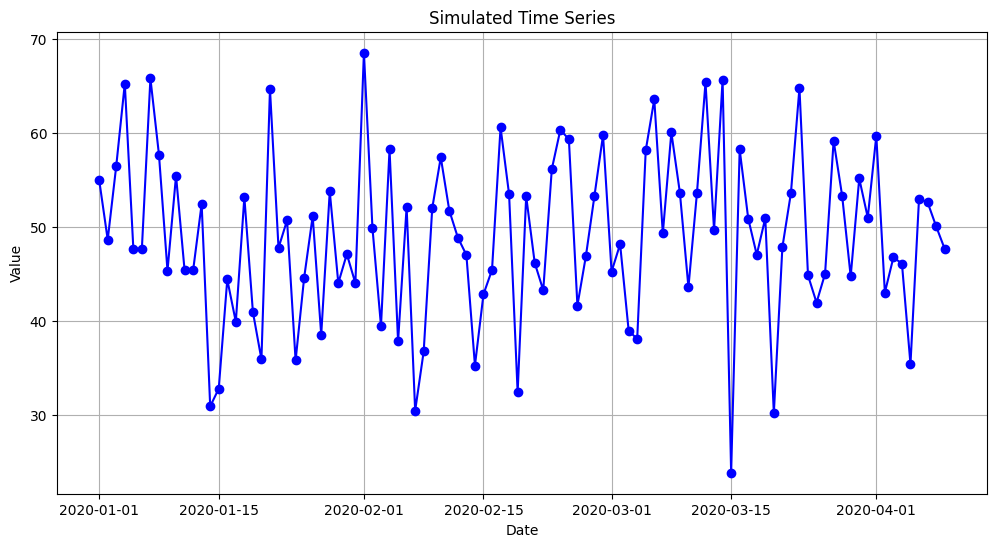

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Generar un rango de fechas
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generar datos simulados (puedes ajustar la media y desviación estándar según tus necesidades)
data = np.random.normal(loc=50, scale=10, size=len(dates))

# Crear un DataFrame
df = pd.DataFrame(data, index=dates, columns=['value'])

# Visualizar la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], marker='o', linestyle='-', color='b')
plt.title('Simulated Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


---
<span  style="color: #5a8d84">

### **Definición:**

</span>

---


Una $\textbf{serie de tiempo}$ es una secuencia de datos numéricos observados o registrados en puntos sucesivos en el tiempo, generalmente a intervalos uniformemente espaciados. Matemáticamente, una serie de tiempo se define como una colección de observaciones $(x_t)$ donde $t$ denota el tiempo y $x_t$ es el valor de la observación en el tiempo $t$.

Formalmente, se puede expresar como:
$$\{x_t\}_{t \in T} = \{x_t\}, \quad t \in T$$
donde:


- $ \{x_t\} $ representa la serie de tiempo,
- $t$ es el índice temporal, y
- $T$ es el conjunto de todos los puntos en el tiempo en los cuales las observaciones se han realizado, como $T = \{t_1, t_2, t_3, \ldots, t_n\} $.

Las series de tiempo pueden ser:

- **Determinísticas** Una serie de tiempo es determinística si su comportamiento puede ser descrito completamente por una función matemática sin componentes aleatorias. En otras palabras, dado un modelo matemático y los valores iniciales, se puede predecir el valor futuro de la serie con exactitud.
  
- **Estocásticas** sna serie de tiempo es estocástica si incluye componentes aleatorias, lo que significa que no se puede predecir con certeza el valor futuro de la serie, incluso conociendo el modelo matemático subyacente. Estas series incorporan variabilidad inherente y están sujetas a incertidumbre.



Si consideramos una serie de tiempo mensual de las ventas de una tienda, donde $x_t$ representa las ventas en el mes $t$, la serie de tiempo puede ser representada como:

$$\{x_t\}_{t=1}^{12} = \{x_1, x_2, x_3, \ldots, x_{12}\}$$

donde $x_1$ son las ventas en enero, $x_2$ las ventas en febrero, y así sucesivamente hasta $x_{12}$, que son las ventas en diciembre.



### Objetivos básicos del análisis

El objetivo básico generalmente es determinar un modelo que describa el
patrón de las series de tiempo. Los usos para tal modelo son:

-   Describir las características importantes del patrón de series de
    tiempo.
-   Explicar cómo el pasado afecta el futuro o cómo dos series
    temporales pueden "interactuar".
-   Para pronosticar valores futuros de la serie.
-   Posiblemente sirva como un estándar de control para una variable que
    mide la calidad del producto en algunas situaciones de fabricación.

La metodología de es una herramienta estadística que pretende estudiar un mismo fenómeno cuantitativo a través del tiempo con la finalidad de poder obtener pronósticos de forma asertiva.

Esta metodología se utiliza ampliamente en los negocios, las ciencias sociales, las ciencias biológicas, y en muchas otras disciplinas.

<span style= "color: #5a8d84 ">

### **Economía y Marketing**

</span>

- Proyecciones del empleo y desempleo.
- Evolución del índice de precios de la leche.
- Beneficios netos mensuales de cierta entidad bancaria.
- Índices del precio del petróleo

<center>
  <img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/economia.png" alt="economia" style="width: 600; height: 400;">
</center>




<span style= "color: #5a8d84 ">

### **Demografía**
</span>


<img src="https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/demografia.png" width=
:600 >
  
  - Número de habitantes por año.
  - Tasa de mortalidad infantil por año.



###  **Medioambiente**

  + Evolución horaria de niveles de óxido de azufre y de niveles de óxido de nitrógeno en una ciudad
durante una serie de años.
  + Lluvia recogida diariamente en una localidad.
  + Temperatura media mensual.
  + Medición diaria del contenido en residuos tóxicos en un río.

<center>

![Demografia](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/medioambiente.png)

### Algunos trabajos en series de tiempo

- Modelo de pronóstico para estimar el comportamiento del precio en bolsa de la energía en Colombia 

- Análisis mediante series de tiempo de los resultados en matemáticas de las pruebas Saber 11 y niveles socioeconómicos NSE usando k-medias" 

- DESARROLLO DE UNA HERRAMIENTA DE PREDICCIÓN DE RENTAS O INGRESOS.CASO DE ESTUDIO EMPRESA DE SERVICIOS  

- PROPUESTA DE MODELO ARIMA PARA LA SERIE TEMPORAL DE LOS CASOS DE COVID 19 EN COLOMBIA APLICANDO LA METODOLOGÍA BOX AND JENKINS 

- MODELO DE PRONÓSTICO PARA ESTIMAR EL COMPORTAMIENTO DEL PRECIO EN BOLSA DE LA ENERGÍA
EN COLOMBIA. 

- MODELO DE IMPACTO DE LAS PRECIPITACIONES MEDIAS MENSUALES
EN EL CAUDAL MÍNIMO MENSUAL DE LAS CUENCAS DEL RÍO CAUCA 

- Análisis del crecimiento económico y la educación a nivel departamental en
Colombia, mediante el modelo de datos panel.

- USO DEL MODELO VAR DE SERIES DE TIEMPO PARA PRONOSTICAR EL INCREMENTO EN EL COSTO DE LOS PRECIOS DE LOS MATERIALES EN LA CONSTRUCCION DE INFRAESTRUCTURA EN COLOMBIA

- Efectos de la tasa de cambio en la compra de software importado en América Latina

### Supuestos para la toma de datos en series temporales

-   Observaciones consecutivas están igualmente espaciadas
-   Aplicar un índice de observación en el tiempo discreto
-   Lo anterior tal vez sólo pueda lograrse de forma aproximada




## Componentes de una serie temporal

-   **Componente tendencia**. Se puede definir como un cambio a largo
    plazo que se produce en la relación al nivel medio, o el cambio a
    largo plazo de la media. La tendencia se identifica con un
    movimiento suave de la serie a largo plazo

-   **Componente estacional** Muchas series temporales presentan cierta
    periodicidad o dicho de otro modo, variación de cierto período
    (semestral, mensual, etc.)

-   **Componente aleatoria:** Esta componente no responde a ningún
    patrón de comportamiento, sino que es el resultado de factores
    fortuitos o aleatorios que inciden de forma aislada en una serie de
    tiempo

$$X_{t}=T_{t}+E_{t}+I_{t}$$

donde: 

- $T_{t}$: es la tendencia 
- $E_{t}$: es la componente estacional 
- $I_{t}$: es la componente aleatoria.

Para hacer inferencias estadísticas en la estructura de un proceso estocástico (o serie de tiempo) sobre el histórico observado del proceso, normalmente se deben hacer algunas suposiciones simplificadoras (presumiblemente razonables) sobre esa estructura. El supuesto más importante es el de  **estacionariedad**.
	 

Dicho concepto tendrá dos versiones:

- Estacionariedad fuerte 
- Estacionariedad débil







## Estacionariedad Fuerte y Débil.

Una serie de tiempo se puede ver como un proceso estocástico, se dice que es estacionario si su media y varianza son constantes en el tiempo y si el valor de la covarianza entre 2 periodos depende sólo de la distancia o rezago entre los tiempos.

Sea $Y_t$ una serie de tiempo con las siguientes propiedades se dice que es debilmente estacionaria o simplemente estacionaria:



 * $E(y_t)$ es  constante para todo $t$.
 * $Var(y_t)$ es constante para todo $t$ y,
 * $Cov(y_t,y_{t+h})$ sólo depende de $h$ para cualquier $t$
 
 La condición adicional para que una serie de tiempo sea fuertemente estacionaria es que la distribución conjunta de $Y_{t_1},Y_{t_2}, \cdots, Y_{t_n}$ es la misma que la distribución conjunta de $Y_{t_1-k}, Y_{t_2-k}, \cdots, Y_{t_n-k}$ para todas las opciones de puntos de tiempo $t_1, t_2, \cdots, t_n$ y todas las opciones de rezago temporal $k$. es decir, la distribución sólo depende de la diferencia de tiempo $h$ y no del tiempo $(t_1,...,t_k)$



<span style="color: red;">
*En la práctica, buscamos que los datos sean estacionarios para poder proseguir con el tratamiento estadístico de los mismos.*
</span>



<span style="color: red;">
**La estacionariedad es un concepto fundamental para el análisis
de las series de tiempo.** 
</span>




- La estacionariedad significa que el proceso mediante el cual se crearon los datos, es constante en el tiempo.

-  **CUIDADO**: Esto no significa que los datos no puedan cambiar. Significa que los supuestos distribucionales del mecanismo que genera los datos son constantes en el
tiempo.
- El punto de partida de la metodología Box-Jenkins es la estacionariedad. De ahí su importancia práctica.




## Asi se ve la no estacionariedad


!["No estacionariedad"](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/noestacionariedad.jpg)



![Estacionariedad vs no estacionariedad](https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/estavsnoest.jpg)




<span style= "color: #5a8d84 ">

## **Ruido Blanco**

</span>


El objetivo de las Series Temporales es descomponer la serie observada en dos partes: una es la parte dependiente del pasado y la otra la parte impredecible

$$Y_t=f(Y_{(t-1)}, Y_{(t-2)},....,Y_1)+ a_t $$

- Si todas las series que observamos en la realidad fuesen Ruido Blanco serían impredecibles y no habría ningún modelo que proponer.


Un **Ruido Blanco** es una serie tal que su media es cero, la varianza es constante y es incorrelacionada.


* $E(a_t)=0$
* $Var(a_t)=\sigma_a^2$
* $cov(a_t,a_{t+_h})=0$



Se trata de un proceso en el que todas sus variables son independientes.


In [11]:
import pandas as pd
import numpy as np
import datetime as dt

ipc=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/IPC.xlsx")
ipc

,Año(aaaa)-Mes(mm),Índice,Inflación anual %,Inflación mensual %,Inflación año corrido %
0,200001,40.30,8.25,1.29,1.29
1,200002,41.23,8.89,2.30,3.62
2,200003,41.93,9.73,1.71,5.39
3,200004,42.35,9.96,1.00,6.44
4,200005,42.57,10.00,0.52,7.00
...,...,...,...,...,...
278,202303,131.77,13.34,1.05,4.56
279,202304,132.80,12.82,0.78,5.38
280,202305,133.38,12.36,0.43,5.83
281,202306,133.78,12.13,0.30,6.15


In [24]:
ipc.index=pd.to_datetime(ipc["Año(aaaa)-Mes(mm)"].astype(str), format="%Y%m")

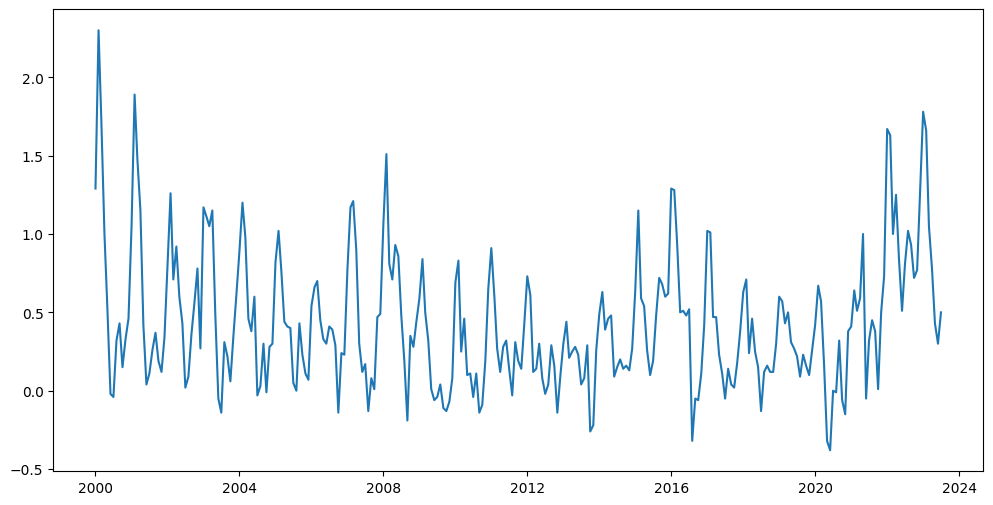

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(ipc.index, ipc["Inflación mensual %"])
# Configurar el formato de las fechas en el eje x


In [30]:
import plotly.express as px

In [32]:
px.line(data_frame=ipc, x=ipc.index, y=ipc["Inflación mensual %"])

In [ ]:
plt.plot(ipc.index, ipc["Inflación mensual %"])

In [34]:
#%pip install bokeh


   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   - -------------------------------------- 0.2/6.8 MB 5.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/6.8 MB 4.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.5/6.8 MB 4.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/6.8 MB 3.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/6.8 MB 3.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/6.8 MB 3.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/6.8 MB 3.7 MB/s eta 0:00:02
   -------- ------------------------------- 1.4/6.8 MB 3.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.5/6.8 MB 3.9 MB/s eta 0:00:02
   ---------- ----------------------------- 1.7/6.8 MB 3.8 MB/s eta 0:00:02
   ----------- ---------------------------- 1.9/6.8 MB 3.8 MB/s eta 0:00:02
   ------------ --------------------------- 2.1/6.8 MB 3.8 MB/s eta 0:00:02
   ------------- --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [37]:
import pandas as pd
from datetime import datetime
import altair as alt



# Restablecer el índice temporalmente para crear el gráfico
df_reset = ipc.reset_index()

# Crear el gráfico con Altair
chart = alt.Chart(df_reset).mark_line(point=True).encode(
    x=alt.X('fecha:T', title='Fecha'),
    y=alt.Y('valor:Q', title='Valor'),
    tooltip=['fecha:T', 'valor:Q']
).properties(
    title='Ejemplo de Gráfico con Fechas usando Altair',
    width=800,
    height=400
).interactive()

# Mostrar el gráfico
chart


ValueError: cannot insert Año(aaaa)-Mes(mm), already exists